In [1]:
import pandas as pd
import numpy as np


In [2]:
data_train = pd.read_excel('C:/Users/moshi/Python Code/train.xlsx') 
data_test = pd.read_excel('C:/Users/moshi/Python Code/test.xlsx')

X_train = data_train.cleaned.tolist()
X_test = data_test.cleaned.tolist()

y_train = data_train.classes.tolist()
y_test = data_test.classes.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['joy', 'sadness','surprise','disgust','anger','fear']

print('size of training set: %s' % (len(data_train['cleaned'])))
print('size of validation set: %s' % (len(data_test['cleaned'])))
print(data.classes.value_counts())

data.head(10)

size of training set: 4994
size of validation set: 625
disgust     1398
sadness     1061
joy         1022
fear         783
anger        692
surprise     663
Name: classes, dtype: int64


,cleaned,classes
0,মেডিকেলে এসে ঠিক ফ্যামিলির ফটো ফ্রেম এর মতো মন...,sadness
1,অনেক দিন পর অন্য রকম অনুভূতি হচ্ছে কেননা আমার...,sadness
2,আগে যতোটা বেশি পছন্দ করতাম দুশ্চরিত্রা মিথিলা ...,disgust
3,মাঝে মাঝে মনে হয় তোমাকে চাওয়াটা অনেক ভুল হয়ত ভ...,sadness
4,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear
5,কান্নার জল সবাই দেখে হৃদয়ের কষ্ট কেউ দেখেনা প...,sadness
6,নির্বাচনের সময় কস্ট করে ভোট চাইসে এর চেয়ে বেশি...,disgust
7,দাদা আপনার video গুলো ভালো লাগে ডকুমেন্টারি টা...,joy
8,বাস্তবতা এটাই কেউ সারাজীবন সুখ চেয়েও পায় নাআর ...,sadness
9,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear


In [3]:
data.tail(10)

,cleaned,classes
5609,এই রকম মাস্টারপিস একটা মুভিকেও লোকেরা নেগেটিভ ...,disgust
5610,স্যারের হাতের লাঠিকে একটু ভয় পেতাম কারণ স্যারে...,fear
5611,ভুল মানুষকে বিয়ে করে ফেললেও তার থেকে মুক্তি পা...,sadness
5612,এই হানে বাল না ফালাইয়া সরকারি কাজে বাল ফালান ...,disgust
5613,ঘটনাটির অস্বাভাবিকতা বোঝাতে গিয়ে ব্রাজিলীয় বিজ...,fear
5614,প্রায় পাঁচ মাস পর পেঁয়াজ রপ্তানিতে নিষেধাজ্ঞা ...,joy
5615,তাহসান ভাই জাস্ট লাভ বালাম ভাই বেস্ট আউটপুট দি...,joy
5616,সাদা পাঞ্জাবি পরা মাথায় লম্বা টুপি একা একা যেত...,fear
5617,দুটি চোখের কান্নার মর্ম যদি কেউ বুঝতো দুঃখের প...,sadness
5618,আমার ব্রেইনে অসুখে ডিম পারছে ৩ বার অপারেশনের প...,sadness


In [4]:
data["classes"].value_counts()

disgust     1398
sadness     1061
joy         1022
fear         783
anger        692
surprise     663
Name: classes, dtype: int64

In [5]:
encoding = {
    'joy': 0, 
    'sadness' :1,
    'surprise':2,
    'disgust':3,
    'anger':4,
    'fear':5
}

In [6]:
text = data['cleaned'].values.tolist()
sentiments = data['classes'].tolist()

In [7]:
from sklearn.model_selection import train_test_split,KFold
X_train, X_test, y_train, y_test = train_test_split(text, sentiments, test_size=.2)

In [8]:
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [10]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)


In [51]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 23
	95percentile : 42
	99percentile : 58


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 23
	95percentile : 43
	99percentile : 59


In [52]:
model = t.get_classifier()

Downloading:   0%|          | 0.00/976M [00:00<?, ?B/s]

In [53]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
749/749 [==============================] - 6855s 9s/step - loss: 88.4944 - accuracy: 0.1593


done.
Visually inspect loss plot and select learning rate associated with falling loss


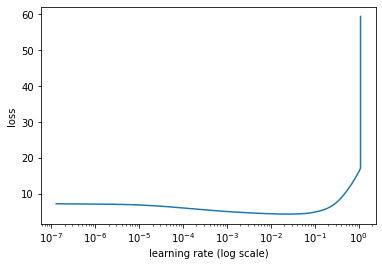

In [54]:
learner.lr_find(show_plot=True, max_epochs=1)

In [55]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
750/750 [==============================] - 7046s 9s/step - loss: 3.3832 - accuracy: 0.2536 - val_loss: 1.6758 - val_accuracy: 0.4012
Epoch 2/4
750/750 [==============================] - 7057s 9s/step - loss: 1.3388 - accuracy: 0.5246 - val_loss: 1.1764 - val_accuracy: 0.5685
Epoch 3/4
750/750 [==============================] - 7071s 9s/step - loss: 0.8366 - accuracy: 0.7017 - val_loss: 1.0741 - val_accuracy: 0.6165
Epoch 4/4
750/750 [==============================] - 7068s 9s/step - loss: 0.4159 - accuracy: 0.8621 - val_loss: 1.1859 - val_accuracy: 0.6219


In [56]:
learner.validate(val_data=(val), class_names=class_names)

              precision    recall  f1-score   support

         joy       0.65      0.67      0.66       199
     sadness       0.61      0.59      0.60       229
    surprise       0.54      0.56      0.55       135
     disgust       0.65      0.69      0.67       275
       anger       0.48      0.45      0.47       134
        fear       0.75      0.70      0.73       152

    accuracy                           0.62      1124
   macro avg       0.61      0.61      0.61      1124
weighted avg       0.62      0.62      0.62      1124



array([[134,  20,  20,  14,   9,   2],
       [ 24, 134,  11,  24,  21,  15],
       [ 20,  15,  75,  11,   2,  12],
       [ 18,  25,  15, 189,  23,   5],
       [  8,   9,   4,  51,  60,   2],
       [  2,  17,  15,   2,   9, 107]], dtype=int64)